In [1]:
import sys
import time
from pyscf import gto, scf, mcscf, mp, cc, dft, ao2mo, lo, fci
from pyscf.tools import molden, cubegen
from pyscf.geomopt.geometric_solver import optimize
import numpy as np
from qiskit_nature.drivers import PySCFDriver, UnitsType, Molecule,  HFMethodType
from qiskit_nature.problems.second_quantization.electronic import ElectronicStructureProblem
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit_nature.mappers.second_quantization import ParityMapper
from qiskit_nature.transformers import ActiveSpaceTransformer, FreezeCoreTransformer
from qiskit.algorithms import NumPyMinimumEigensolver
from qiskit_nature.algorithms.ground_state_solvers import GroundStateEigensolver
#import basis_set_exchange

# qiskit
from qiskit.utils import QuantumInstance
from qiskit import Aer
from qiskit.algorithms.minimum_eigen_solvers import NumPyMinimumEigensolver, VQE
from qiskit.algorithms.optimizers import SLSQP
from qiskit.circuit.library import ExcitationPreserving
from qiskit import BasicAer
from qiskit.algorithms import NumPyMinimumEigensolver, VQE
from qiskit.algorithms.optimizers import SLSQP

# qiskit nature imports
from qiskit_nature.problems.second_quantization import ElectronicStructureProblem
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit_nature.mappers.second_quantization import JordanWignerMapper
from qiskit_nature.algorithms import GroundStateEigensolver
from qiskit_nature.drivers import PySCFDriver, UnitsType, Molecule
from qiskit_nature.algorithms.pes_samplers import BOPESSampler, Extrapolator

from qiskit_nature.mappers.second_quantization import ParityMapper, BravyiKitaevMapper, JordanWignerMapper, FermionicMapper
from qiskit_nature.converters.second_quantization.qubit_converter import QubitConverter
from qiskit_nature.circuit.library import UCCSD, PUCCD, SUCCD
from qiskit_nature.circuit.library import HartreeFock
from qiskit.algorithms import VQE
from IPython.display import display, clear_output
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B, SPSA, SLSQP
from qiskit_nature.algorithms import GroundStateEigensolver


In [2]:
#Function to define a molecule with the GTO class
def my_pyscf_mol(xyz_file ,symmetry, spin, charge, units, basis, output):
    my_molecule = gto.Mole()
    my_molecule.fromfile(str(xyz_file))
    my_molecule.symmetry = symmetry
    my_molecule.spin = spin
    my_molecule.charge = charge
    my_molecule.unit = units
    my_moleculeverbose = 5 
    my_molecule.basis = basis
    my_molecule.output = output
    my_molecule.build()
    return my_molecule

In [3]:
#Read previously optimized RHF Optimized structures
molecule_D1 = my_pyscf_mol(xyz_file="align/Dimer1.xyz", symmetry=True, spin=0 , charge=0, units='A', basis='sto3g',output='D1.out')
molecule_D2 = my_pyscf_mol(xyz_file="align/Dimer2.xyz", symmetry=True, spin=0 , charge=0, units='A', basis='sto3g',output='D2.out')
molecule_D3 = my_pyscf_mol(xyz_file="align/Dimer3.xyz", symmetry=True, spin=0 , charge=0, units='A', basis='sto3g',output='D3.out')
molecule_D4 = my_pyscf_mol(xyz_file="align/Dimer4.xyz", symmetry=True, spin=0 , charge=0, units='A', basis='sto3g',output='D4.out')
molecule_D5 = my_pyscf_mol(xyz_file="align/Dimer5.xyz", symmetry=True, spin=0 , charge=0, units='A', basis='sto3g',output='D5.out')
molecule_D6 = my_pyscf_mol(xyz_file="align/Dimer6.xyz", symmetry=True, spin=0 , charge=0, units='A', basis='sto3g',output='D6.out')
molecule_D7 = my_pyscf_mol(xyz_file="align/Dimer7.xyz", symmetry=True, spin=0 , charge=0, units='A', basis='sto3g',output='D7.out')
molecule_D8 = my_pyscf_mol(xyz_file="align/Dimer8.xyz", symmetry=True, spin=0 , charge=0, units='A', basis='sto3g',output='D8.out')
molecule_D9 = my_pyscf_mol(xyz_file="align/Dimer9.xyz", symmetry=True, spin=0 , charge=0, units='A', basis='sto3g',output='D9.out')
molecule_D10 = my_pyscf_mol(xyz_file="align/Dimer10.xyz", symmetry=True, spin=0 , charge=0, units='A', basis='sto3g',output='D10.out')
molecule_D11 = my_pyscf_mol(xyz_file="align/Dimer11.xyz", symmetry=True, spin=0 , charge=0, units='A', basis='sto3g',output='D11.out')
molecule_D12 = my_pyscf_mol(xyz_file="align/Dimer12.xyz", symmetry=True, spin=0 , charge=0, units='A', basis='sto3g',output='D12.out')



output file: D1.out
output file: D2.out
output file: D3.out
output file: D4.out
output file: D5.out
output file: D6.out
output file: D7.out
output file: D8.out
output file: D9.out
output file: D10.out
output file: D11.out
output file: D12.out


To get different distances is necessary to move the first 6 atoms

In [4]:
disp = np.linspace(0, 0.5, 8)

In [5]:
mf_D1 = scf.RHF(molecule_D1)
mf_D1.kernel()


-153.77047837825086

In [6]:
mf_D1.mo_occ

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

([], [])

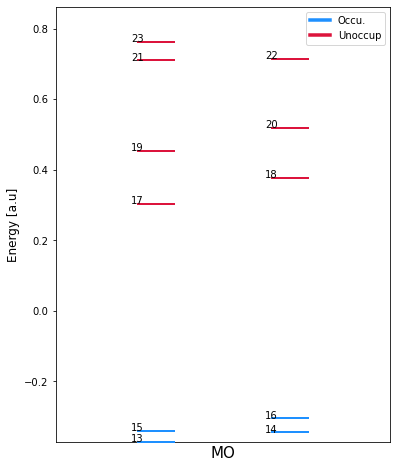

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

#Energies and occupation 
Energies = mf_D1.mo_energy # Energies
Occupation = mf_D1.mo_occ/2 # Number of occupied orbitals
Orbital_number = int(len(Occupation)) # Number of orbitals within the basis set used

x = np.zeros(len(Energies))
#Get to arrays with occupied and unoccupied MO
counter=np.sum(Occupation)  
occ_mo = Energies[0:int(counter)] # Occupied MOs array
x_occ = np.zeros(len(occ_mo))
unocc_mo = Energies[int(counter):len(Energies)] # Unccupied MOs array
x_unocc = np.zeros(len(unocc_mo))

mo_numbers = np.arange(len(Energies)) + 1

#Separate the MOs energies in x-axis
x_new = np.zeros(len(Energies))
i = 0
while i < len(Energies)-1:
    temp = Energies[i]-Energies[i+1]
    temp = np.abs(temp)
    if temp > 0.2:
        x_new[i] = 0
        i = i + 1
    elif temp < 0.2:
        x_new[i] = -0.04
        x_new[i+1] = 0.04
        i = i+2

x_occ = x_new[0:int(counter)]
x_unocc = x_new[int(counter):len(Energies)]
#Plotting occupied and unoccupied in red and blue
plt.figure(figsize=(6,8))
plt.scatter(x_occ, occ_mo, c='dodgerblue', s=1444, marker="_", linewidth=2, zorder=3)
plt.scatter(x_unocc, unocc_mo, c='crimson', s=1444, marker="_", linewidth=2, zorder=3)

#Define limits of visualization
low_lim = int(counter)-3 # HOMO-3
top_lim = int(counter)+7 # LUMO+7

if top_lim > Orbital_number:
    top_lim = Orbital_number

if low_lim < 0:
    low_lim = 0

#Put the index of a range HOMO-2 and LUMO+2 (This can be an option)
for i in np.arange(low_lim,top_lim+1):
    index =int(i-1)
    text = str(i)
    plt.annotate(text, xy=(x_new[index],Energies[index]),xytext=(x_new[index]-0.015,Energies[index]) ,xycoords='data' )


plt.ylabel('Energy [a.u]',fontsize=12) 
plt.xlabel('MO',fontsize=15)
legend_elements = [Line2D([0], [0], color='dodgerblue',lw=3.5, label='Occu.'), Line2D([0], [0], color='crimson',lw=3.5, label='Unoccup'),]
plt.legend(handles=legend_elements,loc='upper right', fontsize=12 ,prop={'size': 10} , ncol=1, fancybox=True)
#Put the limits in y- HOMO-3 and LUMO+4 (This can be an option)
plt.ylim(Energies[low_lim-1],Energies[top_lim-1]+0.1) 
plt.xlim(-0.1,0.1) 
plt.xticks([])

In [8]:
disp =  np.linspace(-0.25, 1, 8) # Increase by 0.07
atoms = np.arange(5)
Energies_Total = [] #This saves the D1 Energy profile

In [9]:
def callback(eval_count, parameters, mean, std):  
    # Overwrites the same line when printing
    display("Evaluation: {}, Energy: {}, Std: {}".format(eval_count, mean, std))
    clear_output(wait=True)
    counts.append(eval_count)
    values.append(mean)
    params.append(parameters)
    deviation.append(std)

In [10]:
molecule_D1.fromfile("Conformers/Dimer1_aligned.xyz") #Read the original structure
molecule_D1.build() # Update the GTO object from PySCF
my_atom_list = molecule_D1.atom
for i in disp:
    my_atom_list = molecule_D1.atom
    for j in atoms:
        temp = float (my_atom_list[j][1][1])
        new_coord = temp + i
        my_atom_list[j][1][1] = str (new_coord)
    molecule_D1.atom = my_atom_list
    molecule_D1.build()
    molecule = Molecule(geometry=molecule_D1.atom,charge=0, multiplicity=1)
    driver = PySCFDriver(molecule=molecule, unit=UnitsType.ANGSTROM, basis=molecule_D1.basis,       hf_method=HFMethodType.RHF)
    q_molecule = driver.run()
    active_space = ActiveSpaceTransformer(num_electrons=4,num_molecular_orbitals=4) #(4,4)
    es_problem = ElectronicStructureProblem(driver, q_molecule_transformers=[active_space])
    second_q_ops = es_problem.second_q_ops()
    main_op = second_q_ops[0]
    converter = QubitConverter(mapper=BravyiKitaevMapper(), two_qubit_reduction=True)
    num_particles = (es_problem.molecule_data_transformed.num_alpha,
             es_problem.molecule_data_transformed.num_beta)
    qubit_op = converter.convert(main_op, num_particles=num_particles)
    num_particles = (es_problem.molecule_data_transformed.num_alpha,
             es_problem.molecule_data_transformed.num_beta)
    num_spin_orbitals = 2 * es_problem.molecule_data_transformed.num_molecular_orbitals
    init_state = HartreeFock(num_spin_orbitals, num_particles, converter)
    ansatz = UCCSD(converter,num_particles,num_spin_orbitals,initial_state = init_state)
    backend = Aer.get_backend('statevector_simulator')
    optimizer = L_BFGS_B(maxfun=500)
    counts = []
    values = []
    params = []
    deviation = []
    try:
        initial_point = [0.01] * len(ansatz.ordered_parameters)
    except:
        initial_point = [0.01] * ansatz.num_parameters
    algorithm = VQE(ansatz,optimizer=optimizer,
                quantum_instance=backend,
                callback=callback,initial_point=initial_point)
    calc = GroundStateEigensolver(converter, algorithm)
    res = calc.solve(es_problem)
    Energies_Total.append(float(res.total_energies))
    molecule_D1.fromfile("Conformers/Dimer1_aligned.xyz") #Read the original structure
    molecule_D1.build() # Update the GTO object from PySCF  

    

'Evaluation: 405, Energy: -3.52631995989236, Std: 0.0'

Text(0, 0.5, 'Energy')

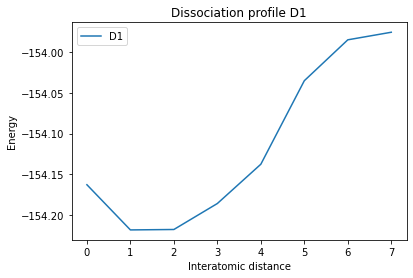

In [11]:
#Plot your FCI results along with your previous calculations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(Energies_Total, label = 'D1')
plt.legend()
plt.title('Dissociation profile D1')
plt.xlabel('Interatomic distance')
plt.ylabel('Energy')
plt.savefig("Diss_Prof_D1")

In [12]:
#How to use the function 
#my_molecule = the GTO object
# xyz_file the Original coordinate system
# nelec for active space 
# norbs for active space 
# disp array of displacements
#Take into account you must displace the first 6 atoms

def EthenePES(my_molecule,xyz_file,nelec,norbs,disp):
    Energies_Total = []
    atoms = np.arange(5)
    my_molecule.fromfile(str(xyz_file)) #Read the original structure
    my_molecule.build() # Update the GTO object from PySCF
    my_atom_list = my_molecule.atom
    for i in disp:
        my_atom_list = my_molecule.atom
        for j in atoms:
            temp = float(my_atom_list[j][1][1])
            new_coord = temp + i
            my_atom_list[j][1][1] = str(new_coord)
        my_molecule.atom = my_atom_list
        my_molecule.build()87t5
        molecule = Molecule(geometry=my_molecule.atom,charge=0, multiplicity=1)
        driver = PySCFDriver(molecule=molecule, unit=UnitsType.ANGSTROM, basis=my_molecule.basis,hf_method=HFMethodType.RHF)
        q_molecule = driver.run()
        active_space = ActiveSpaceTransformer(num_electrons=nelec,num_molecular_orbitals=norbs) #(4,4)
        es_problem = ElectronicStructureProblem(driver, q_molecule_transformers=[active_space])
        second_q_ops = es_problem.second_q_ops()
        main_op = second_q_ops[0]
        converter = QubitConverter(mapper=BravyiKitaevMapper(), two_qubit_reduction=True)
        num_particles = (es_problem.molecule_data_transformed.num_alpha,
                es_problem.molecule_data_transformed.num_beta)
        qubit_op = converter.convert(main_op, num_particles=num_particles)
        num_particles = (es_problem.molecule_data_transformed.num_alpha,
                es_problem.molecule_data_transformed.num_beta)
        num_spin_orbitals = 2 * es_problem.molecule_data_transformed.num_molecular_orbitals
        init_state = HartreeFock(num_spin_orbitals, num_particles, converter)
        ansatz = UCCSD(converter,num_particles,num_spin_orbitals,initial_state = init_state)
        backend = Aer.get_backend('statevector_simulator')
        optimizer = L_BFGS_B(maxfun=500)
        counts = []
        values = []
        params = []
        deviation = []
        try:
            initial_point = [0.01] * len(ansatz.ordered_parameters)
        except:
            initial_point = [0.01] * ansatz.num_parameters
        algorithm = VQE(ansatz,optimizer=optimizer,
                    quantum_instance=backend,
                    callback=callback,initial_point=initial_point)
        calc = GroundStateEigensolver(converter, algorithm)
        res = calc.solve(es_problem)
        Energies_Total.append(float(res.total_energies))
        my_molecule.fromfile(str(xyz_file)) #Read the original structure
        my_molecule.build() # Update the GTO object from PySCF  
    return Energies_Total

[-153.7873647258807, -153.9129237469901, -153.9521906967793, -153.93833316987664, -153.95951492577208, -153.96806645048883, -153.93868630785732, -153.93396469705027, -153.9259090215523, -153.91583535106372]


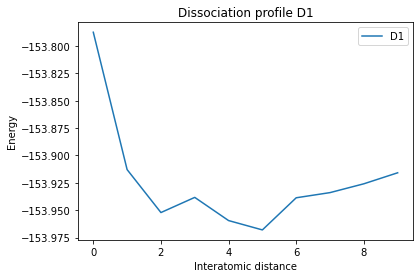

In [18]:
###### Example saving the energies in ED#
disp =  np.linspace(0.0, 0.8, 10)
ED1= EthenePES(my_molecule=molecule_D1,xyz_file="align/Dimer1.xyz",nelec=4, norbs=4, disp=disp )
#ED2= EthenePES(my_molecule=molecule_D2,xyz_file="align/Dimer2.xyz",nelec=4, norbs=4, disp=disp )
#ED3= EthenePES(my_molecule=molecule_D3,xyz_file="align/Dimer3.xyz",nelec=4, norbs=4, disp=disp )
#ED4= EthenePES(my_molecule=molecule_D4,xyz_file="align/Dimer4.xyz",nelec=4, norbs=4, disp=disp )
#ED5= EthenePES(my_molecule=molecule_D5,xyz_file="align/Dimer5.xyz",nelec=4, norbs=4, disp=disp )
#ED6= EthenePES(my_molecule=molecule_D6,xyz_file="align/Dimer6.xyz",nelec=4, norbs=4, disp=disp )
#ED7= EthenePES(my_molecule=molecule_D7,xyz_file="align/Dimer7.xyz",nelec=4, norbs=4, disp=disp )
#ED8= EthenePES(my_molecule=molecule_D8,xyz_file="align/Dimer8.xyz",nelec=4, norbs=4, disp=disp )
#ED9= EthenePES(my_molecule=molecule_D9,xyz_file="align/Dimer9.xyz",nelec=4, norbs=4, disp=disp )
#ED10= EthenePES(my_molecule=molecule_D10,xyz_file="align/Dimer10.xyz",nelec=4, norbs=4, disp=disp )
#ED11= EthenePES(my_molecule=molecule_D11,xyz_file="align/Dimer11.xyz",nelec=4, norbs=4, disp=disp )
#ED12= EthenePES(my_molecule=molecule_D12,xyz_file="align/Dimer12.xyz",nelec=4, norbs=4, disp=disp )
print(ED1)
fig = plt.figure()
plt.plot(ED1, label = 'D1')
plt.legend()
plt.title('Dissociation profile D1')
plt.xlabel('Interatomic distance')
plt.ylabel('Energy')
plt.savefig("Diss_Prof_D1.png")

[-154.22369411246348, -154.22011595080588, -154.2083909780411, -154.190755803811, -154.16891096154532, -154.14400927242554, -154.11599065880333, -154.04389842052447, -154.0039030534166, -153.98451714377993]


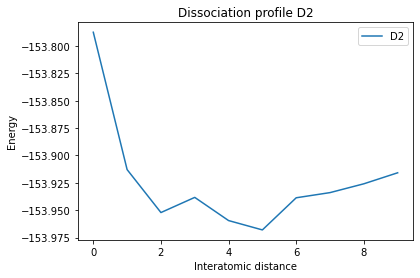

In [19]:
ED2= EthenePES(my_molecule=molecule_D2,xyz_file="align/Dimer2.xyz",nelec=4, norbs=4, disp=disp )
print(ED2)
fig = plt.figure()
plt.plot(ED1, label = 'D2')
plt.legend()
plt.title('Dissociation profile D2')
plt.xlabel('Interatomic distance')
plt.ylabel('Energy')
plt.savefig("Diss_Prof_D2.png")

[-154.18523041385458, -154.19596973976184, -154.20240592182262, -154.20507927955197, -154.204171245395, -154.19970419613526, -154.1916731511372, -154.18012810751648, -154.1652171876746, -154.14720618906068]


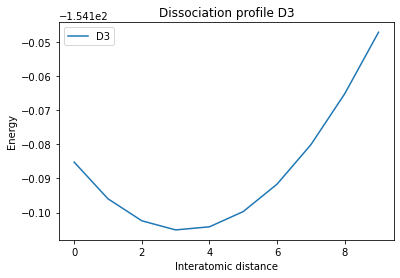

In [20]:
ED3= EthenePES(my_molecule=molecule_D3,xyz_file="align/Dimer3.xyz",nelec=4, norbs=4, disp=disp )
print(ED3)
fig = plt.figure()
plt.plot(ED3, label = 'D3')
plt.legend()
plt.title('Dissociation profile D3')
plt.xlabel('Interatomic distance')
plt.ylabel('Energy')
plt.savefig("Diss_Prof_D3.png")

[-154.1914508465511, -154.20051944654335, -154.20570534607685, -154.20741285916512, -154.20574058524932, -154.20065501552878, -154.19211364577603, -154.1801421738295, -154.1648734866569, -154.14656540153527]


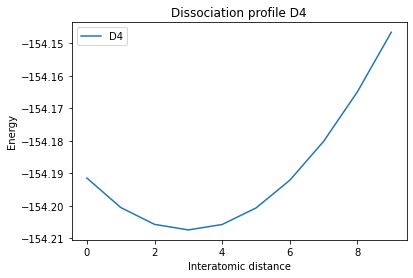

In [21]:
ED4= EthenePES(my_molecule=molecule_D4,xyz_file="align/Dimer4.xyz",nelec=4, norbs=4, disp=disp )
print(ED4)
fig = plt.figure()
plt.plot(ED4, label = 'D4')
plt.legend()
plt.title('Dissociation profile D4')
plt.xlabel('Interatomic distance')
plt.ylabel('Energy')
plt.savefig("Diss_Prof_D4.png")

[-153.8485081702085, -153.91274863660976, -153.95914850802706, -153.99090552302175, -154.0109387611423, -154.02181798965523, -154.02578897175283, -154.02483296940295, -154.02066265436332, -154.0146821876088]


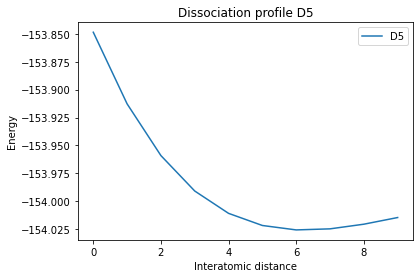

In [22]:
ED5= EthenePES(my_molecule=molecule_D5,xyz_file="align/Dimer5.xyz",nelec=4, norbs=4, disp=disp )
print(ED5)
fig = plt.figure()
plt.plot(ED5, label = 'D5')
plt.legend()
plt.title('Dissociation profile D5')
plt.xlabel('Interatomic distance')
plt.ylabel('Energy')
plt.savefig("Diss_Prof_D5.png")

[-154.16699462139707, -154.1757580192202, -154.1675575963048, -154.13912898487763, -154.08712601252057, -154.00923452806106, -153.9060092137653, -153.78318485131325, -153.65343885742897, -153.53557517794445]


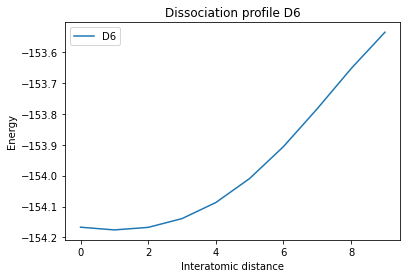

In [23]:
ED6= EthenePES(my_molecule=molecule_D6,xyz_file="align/Dimer6.xyz",nelec=4, norbs=4, disp=disp )
print(ED6)
fig = plt.figure()
plt.plot(ED6, label = 'D6')
plt.legend()
plt.title('Dissociation profile D6')
plt.xlabel('Interatomic distance')
plt.ylabel('Energy')
plt.savefig("Diss_Prof_D6.png")

[-154.20257154722998, -154.2069516384921, -154.2044021013919, -154.19596291947101, -154.1830245877357, -154.16712811893683, -154.14962867239677, -154.13134153560483, -154.11233469353954, -154.09197723597867]


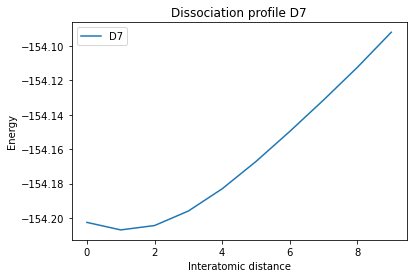

In [24]:
ED7= EthenePES(my_molecule=molecule_D7,xyz_file="align/Dimer7.xyz",nelec=4, norbs=4, disp=disp )
print(ED7)
fig = plt.figure()
plt.plot(ED7, label = 'D7')
plt.legend()
plt.title('Dissociation profile D7')
plt.xlabel('Interatomic distance')
plt.ylabel('Energy')
plt.savefig("Diss_Prof_D7.png")

[-154.0078760829137, -154.05406529175355, -154.08517970828314, -154.10364049609115, -154.1120207756282, -154.11287568619576, -154.10842576026857, -154.10021507381452, -154.08891239838903, -154.0743632351119]


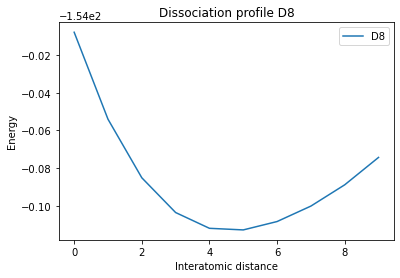

In [25]:
ED8= EthenePES(my_molecule=molecule_D8,xyz_file="align/Dimer8.xyz",nelec=4, norbs=4, disp=disp )
print(ED8)
fig = plt.figure()
plt.plot(ED8, label = 'D8')
plt.legend()
plt.title('Dissociation profile D8')
plt.xlabel('Interatomic distance')
plt.ylabel('Energy')
plt.savefig("Diss_Prof_D8.png")

[-154.19084770257223, -154.19523577807783, -154.19273619516005, -154.18414475651417, -154.17031169032947, -154.15197449505558, -154.12952340587182, -154.10264006232873, -154.03145102773368, -154.00039668652948]


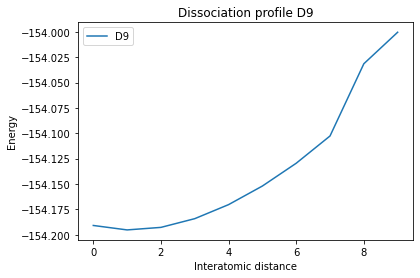

In [26]:
ED9= EthenePES(my_molecule=molecule_D9,xyz_file="align/Dimer9.xyz",nelec=4, norbs=4, disp=disp )
print(ED9)
fig = plt.figure()
plt.plot(ED9, label = 'D9')
plt.legend()
plt.title('Dissociation profile D9')
plt.xlabel('Interatomic distance')
plt.ylabel('Energy')
plt.savefig("Diss_Prof_D9.png")

[-154.14725206615861, -154.1656510594812, -154.17359504645378, -154.173024292324, -154.16599563091523, -154.1545442480888, -154.14039305249787, -154.12463279675015, -154.10754204006042, -154.08866143022695]


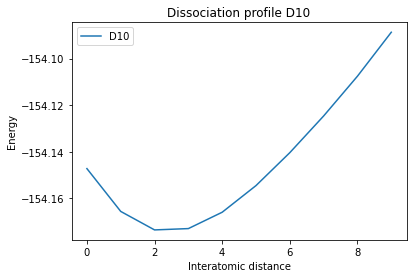

In [27]:
ED10= EthenePES(my_molecule=molecule_D10,xyz_file="align/Dimer10.xyz",nelec=4, norbs=4, disp=disp )
print(ED10)
fig = plt.figure()
plt.plot(ED10, label = 'D10')
plt.legend()
plt.title('Dissociation profile D10')
plt.xlabel('Interatomic distance')
plt.ylabel('Energy')
plt.savefig("Diss_Prof_D10.png")

[-154.22491331813535, -154.22589546107508, -154.22523985258334, -154.22279548401542, -154.2182755025341, -154.21135254638017, -154.20174908896843, -154.18930254252166, -154.17400049392535, -154.15599677520822]


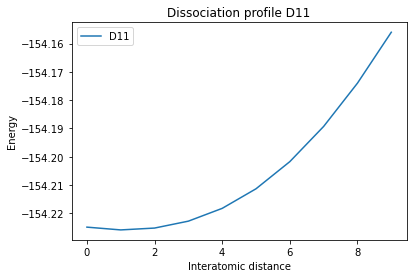

In [28]:
ED11= EthenePES(my_molecule=molecule_D11,xyz_file="align/Dimer11.xyz",nelec=4, norbs=4, disp=disp )
print(ED11)
fig = plt.figure()
plt.plot(ED11, label = 'D11')
plt.legend()
plt.title('Dissociation profile D11')
plt.xlabel('Interatomic distance')
plt.ylabel('Energy')
plt.savefig("Diss_Prof_D11.png")

[-154.2049133278889, -154.205974265117, -154.19149767411255, -154.15817915075496, -154.10267299004207, -154.02271894862454, -153.91895406277953, -153.79713574649898, -153.66974951000975, -153.55506708247424]


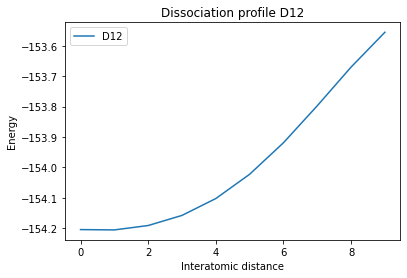

In [29]:
ED12= EthenePES(my_molecule=molecule_D12,xyz_file="align/Dimer12.xyz",nelec=4, norbs=4, disp=disp )
print(ED12)
fig = plt.figure()
plt.plot(ED12, label = 'D12')
plt.legend()
plt.title('Dissociation profile D12')
plt.xlabel('Interatomic distance')
plt.ylabel('Energy')
plt.savefig("Diss_Prof_D12.png")

In [30]:
print(disp)

[0.         0.08888889 0.17777778 0.26666667 0.35555556 0.44444444
 0.53333333 0.62222222 0.71111111 0.8       ]
